In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack, csr_matrix
from sklearn.ensemble import GradientBoostingClassifier
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Shiva
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd

# Try this first
df = pd.read_csv(r"spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove non-alphabetic characters (numbers and punctuations)
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [10]:
# Apply preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)

# Check the cleaned data
print(df.head())

  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4                                    cleaned_message  
0        NaN        NaN  go jurong point crazy available bugis n great ...  
1        NaN        NaN                            ok lar joking wif u oni  
2        NaN        NaN  free entry wkly comp win fa cup final tkts st ...  
3        NaN        NaN                u dun say early hor u c already say  
4        NaN        NaN        nah dont think goes usf lives around though  


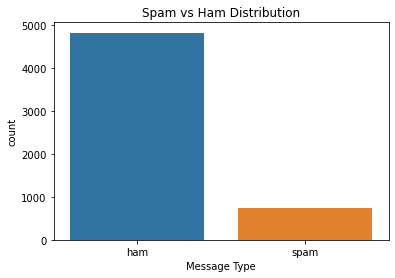

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='label')
plt.title('Spam vs Ham Distribution')
plt.xlabel('Message Type')
plt.ylabel('count')
plt.show()

In [15]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Convert the cleaned messages into a feature matrix
X = tfidf_vectorizer.fit_transform(df["cleaned_message"]).toarray()

# Check the feature matrix
print(X.shape)

(5572, 5000)


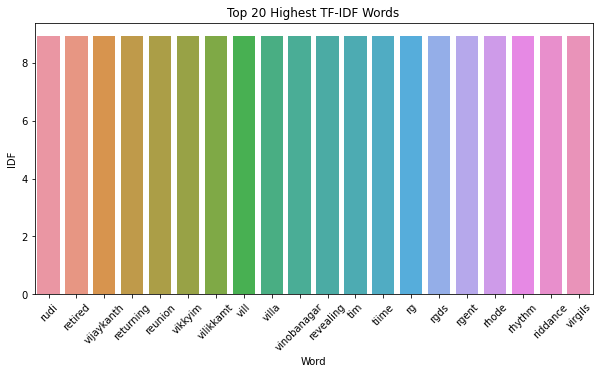

In [16]:
# Assuming tfidf_vectorizer is your fitted TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()
idf_scores = tfidf_vectorizer.idf_

# Create DataFrame for visualization
import pandas as pd
idf_df = pd.DataFrame({'Word': feature_names, 'IDF': idf_scores})
idf_df = idf_df.sort_values(by='IDF', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='Word', y='IDF', data=idf_df)
plt.xticks(rotation=45)
plt.title('Top 20 Highest TF-IDF Words')
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using bigrams (2-grams)
tfidf_vectorizer_bigrams = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

# Fit the vectorizer to the cleaned messages
X_bigrams = tfidf_vectorizer_bigrams.fit_transform(df["cleaned_message"]).toarray()
print(X_bigrams.shape)

(5572, 5000)


In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Shiva
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the messages
df['tokens'] = df['cleaned_message'].apply(word_tokenize)

# Train the Word2Vec model
word2vec_model = Word2Vec(df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Get the vector for a sample word
vector = word2vec_model.wv['spam']

# Output: Vector for the word 'spam'
print(vector)

[-8.9321760e-03  5.7800272e-03  5.6260265e-03 -5.9546798e-04
 -7.8790803e-03 -5.6954664e-03 -5.0699841e-03  2.0180138e-02
 -6.5239915e-03  6.0466561e-03  3.7906382e-03 -1.3664892e-02
 -2.3785324e-03  6.4134952e-03  9.9381953e-03 -1.9278235e-03
 -6.9800518e-03 -2.8995636e-03 -4.9607689e-03 -9.0810796e-03
 -1.0303111e-03  4.8530633e-03 -3.0640541e-03  6.5016658e-03
  5.7676295e-03 -1.9832950e-03 -9.0273432e-03 -1.1130336e-03
 -1.6337346e-02  5.4905568e-03 -3.8283160e-03  8.9312037e-03
 -6.0752095e-03 -1.4188129e-02 -5.3676311e-03  2.2711666e-04
 -9.2917513e-03 -1.3288185e-02  3.5151322e-03 -7.3731546e-03
  1.1863379e-02 -7.6355692e-03 -1.0230377e-02  9.6915606e-03
  8.4377835e-03 -7.6466515e-03 -1.0212271e-02  4.7971196e-03
 -9.4486668e-04  8.0131609e-03  1.0390228e-02 -1.3170873e-02
 -1.0721098e-02 -1.4230949e-03  5.2847387e-03  3.9825137e-03
  2.9202260e-03  4.6187416e-03 -3.7037616e-04 -5.3515416e-03
  1.1768549e-02  2.1992852e-03 -7.7295098e-03  2.3824770e-03
 -1.5229047e-02  1.23778

In [21]:
# Encode the target variable (spam = 1, ham = 0)
y = df["label"].apply(lambda x: 1 if x == "spam" else 0)


In [22]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
pip install textblob

  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [24]:
from textblob import TextBlob

# Sentiment polarity: -1 (negative) to 1 (positive)
df['sentiment'] = df['cleaned_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Output: Sentiment values for the first 5 messages
print(df[['cleaned_message', 'sentiment']].head())

                                     cleaned_message  sentiment
0  go jurong point crazy available bugis n great ...        0.2
1                            ok lar joking wif u oni        0.5
2  free entry wkly comp win fa cup final tkts st ...        0.4
3                u dun say early hor u c already say        0.1
4        nah dont think goes usf lives around though        0.0


In [25]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def sentiment_label(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.5:
        return 1  # Positive sentiment
    elif polarity < -0.5:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply sentiment analysis to the 'cleaned_message' column
df['sentiment'] = df['cleaned_message'].apply(sentiment_label)

# Now, sentiment_feature should be the sentiment values (as a sparse matrix or array)
sentiment_feature = df['sentiment'].values.reshape(-1, 1)

In [26]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Shiva Sai\AppData\Roaming\nltk_data...
[nltk_data] Error downloading 'averaged_perceptron_tagger_eng' from
[nltk_data]     <https://raw.githubusercontent.com/nltk/nltk_data/gh-p
[nltk_data]     ages/packages/taggers/averaged_perceptron_tagger_eng.z
[nltk_data]     ip>:   <urlopen error [Errno 11001] getaddrinfo
[nltk_data]     failed>


False

In [28]:
import nltk
from nltk import pos_tag, word_tokenize

# Download required resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

# Apply POS tagging
df['pos_tags'] = df['cleaned_message'].apply(lambda x: pos_tag(word_tokenize(x)))

# Preview
print(df[['cleaned_message', 'pos_tags']].head())


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shiva Sai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to C:\Users\Shiva
[nltk_data]     Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                     cleaned_message  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry wkly comp win fa cup final tkts st ...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                            pos_tags  
0  [(go, VB), (jurong, JJ), (point, NN), (crazy, ...  
1  [(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),...  
2  [(free, JJ), (entry, NN), (wkly, VBD), (comp, ...  
3  [(u, JJ), (dun, NNS), (say, VBP), (early, JJ),...  
4  [(nah, JJ), (dont, NN), (think, NN), (goes, VB...  


In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Tokenize and POS tagging
df['pos_tags'] = df['cleaned_message'].apply(lambda x: pos_tag(word_tokenize(x)))

# Example: Extracting the count of nouns, verbs, etc.
def extract_pos_features(pos_tags):
    pos_counts = {
        'NN': 0, 'VB': 0, 'JJ': 0  # Noun, Verb, Adjective counts
    }
    for word, tag in pos_tags:
        if tag.startswith('NN'):
            pos_counts['NN'] += 1
        elif tag.startswith('VB'):
            pos_counts['VB'] += 1
        elif tag.startswith('JJ'):
            pos_counts['JJ'] += 1
    return list(pos_counts.values())

# Apply POS feature extraction
pos_features_df = pd.DataFrame(df['pos_tags'].apply(extract_pos_features).tolist(), columns=['NN', 'VB', 'JJ'])


In [30]:
# Reshape sentiment_feature to be a column vector (5572, 1)
sentiment_feature = df['sentiment'].values.reshape(-1, 1)


In [31]:
# Ensure pos_features_df is a DataFrame (which it should be)
pos_features_df = pd.DataFrame(df['pos_tags'].apply(extract_pos_features).tolist(), columns=['NN', 'VB', 'JJ'])

In [32]:
from scipy.sparse import csr_matrix

# Reshape sentiment_feature to a column vector and convert it to a sparse matrix
sentiment_feature_sparse = csr_matrix(df['sentiment'].values.reshape(-1, 1))

# Assuming pos_features_df is already in the correct shape (2D array or DataFrame)
# Convert pos_features_df to a sparse matrix
pos_features_sparse = csr_matrix(pos_features_df.values)

In [34]:
from scipy.sparse import hstack

# Assuming X is your TF-IDF or other sparse matrix features
X_combined = hstack([X, sentiment_feature_sparse, pos_features_sparse])

# Now you can use X_combined to train your model
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_combined, df['label'])  # Replace 'Category' with the target variable


GradientBoostingClassifier(random_state=42)

In [38]:
df = df.rename(columns={'v1': 'label', 'v2': 'Message'})


In [40]:
import re

df['cleaned_message'] = df['label'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', str(x)).lower())

print(df[['label', 'cleaned_message']].head())


  label cleaned_message
0   ham             ham
1   ham             ham
2  spam            spam
3   ham             ham
4   ham             ham


In [48]:
from textblob import TextBlob

# Compute sentiment polarity: -1 (negative) to 1 (positive)
df['sentiment'] = df['cleaned_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check the dataframe with sentiment scores
print(df.head())


  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4 cleaned_message  \
0        NaN        NaN             ham   
1        NaN        NaN             ham   
2        NaN        NaN            spam   
3        NaN        NaN             ham   
4        NaN        NaN             ham   

                                              tokens  sentiment  \
0  [go, jurong, point, crazy, available, bugis, n...        0.0   
1                     [ok, lar, joking, wif, u, oni]        0.0   
2  [free, entry, wkly, comp, win, fa, cup, final,...        0.0   
3      [u, dun, say, early, hor, u

In [51]:
print(df.columns)



Index(['label', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'cleaned_message', 'tokens', 'sentiment', 'pos_tags'],
      dtype='object')


In [53]:
df['cleaned_message'] = df['message'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', str(x)).lower())


In [54]:
df.rename(columns={'message': 'Message'}, inplace=True)


In [58]:
from sklearn.model_selection import train_test_split

# Make sure your text column exists (print df.columns if unsure)
df = df.rename(columns=lambda x: x.strip())  # Remove whitespace from column names if any
df['cleaned_message'] = df['Message'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', str(x)).lower())

X = df['cleaned_message']
y = df['label']

X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit on training and transform both
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)


In [60]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)


GradientBoostingClassifier()

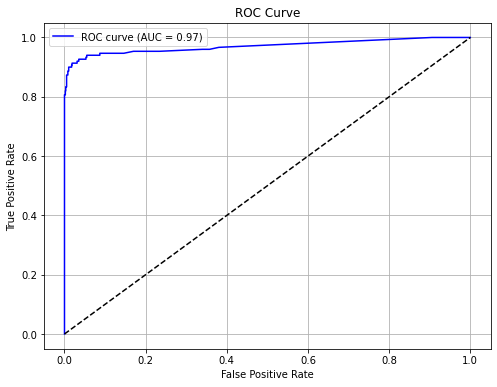

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


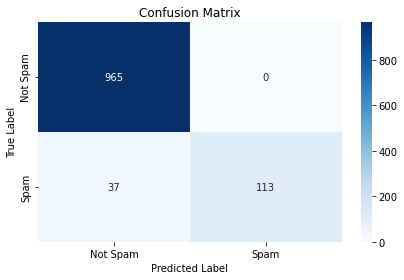

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
predictions = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Spam", "Spam"], 
            yticklabels=["Not Spam", "Spam"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X_combined' is your combined feature matrix (e.g., TF-IDF, sentiment, POS features, etc.)
# 'y' is the target variable (Category: ham or spam)
X = X_combined  # Your combined feature matrix (TF-IDF + Sentiment + other features)
y = df['label'].map({'ham': 0, 'spam': 1})  # Encode labels as 0 and 1 (ham: 0, spam: 1)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier (you can use any classifier, here using GradientBoostingClassifier)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 96.32%
